In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
!python -m pip install prophet

In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('sales.csv')

In [5]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [7]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [8]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])

In [9]:
df['Date'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [10]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
Date         datetime64[ns]
dtype: object

In [11]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Train Model

In [13]:
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(df)

10:02:47 - cmdstanpy - INFO - Chain [1] start processing
10:02:47 - cmdstanpy - INFO - Chain [1] done processing


# Sales Forecasting

In [14]:
prediction_df = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(prediction_df)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.048205,817.821348,4042.323288,3042.048205,3042.048205,-639.968658,-639.968658,-639.968658,469.981175,...,16.612351,16.612351,16.612351,-1126.562183,-1126.562183,-1126.562183,0.0,0.0,0.0,2402.079547
1,2018-01-02,3042.784429,851.993592,4018.087618,3042.784429,3042.784429,-650.109098,-650.109098,-650.109098,469.981175,...,-11.286966,-11.286966,-11.286966,-1108.803306,-1108.803306,-1108.803306,0.0,0.0,0.0,2392.675332
2,2018-01-03,3043.520654,896.035288,4034.677934,3043.520654,3043.520654,-624.292184,-624.292184,-624.292184,469.981175,...,-4.411160,-4.411160,-4.411160,-1089.862199,-1089.862199,-1089.862199,0.0,0.0,0.0,2419.228470
3,2018-01-04,3044.256878,859.392626,4008.808641,3044.256878,3044.256878,-577.364032,-577.364032,-577.364032,469.981175,...,22.469755,22.469755,22.469755,-1069.814962,-1069.814962,-1069.814962,0.0,0.0,0.0,2466.892846
4,2018-01-05,3044.993103,938.384862,3997.877427,3044.993103,3044.993103,-613.393704,-613.393704,-613.393704,469.981175,...,-34.584504,-34.584504,-34.584504,-1048.790375,-1048.790375,-1048.790375,0.0,0.0,0.0,2431.599398


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4237.837606,2265.022507,5226.380236,4234.492309,4241.146582,-512.813075,-512.813075,-512.813075,469.981175,...,16.612351,16.612351,16.612351,-999.406600,-999.406600,-999.406600,0.0,0.0,0.0,3725.024532
1176,2021-03-23,4238.914117,2045.087530,5226.582229,4235.554272,4242.287741,-530.267983,-530.267983,-530.267983,469.981175,...,-11.286966,-11.286966,-11.286966,-988.962192,-988.962192,-988.962192,0.0,0.0,0.0,3708.646134
1177,2021-03-24,4239.990627,2148.703343,5409.936971,4236.578261,4243.428900,-515.725274,-515.725274,-515.725274,469.981175,...,-4.411160,-4.411160,-4.411160,-981.295289,-981.295289,-981.295289,0.0,0.0,0.0,3724.265353
1178,2021-03-25,4241.067137,2200.297208,5330.144103,4237.574348,4244.570059,-484.537991,-484.537991,-484.537991,469.981175,...,22.469755,22.469755,22.469755,-976.988921,-976.988921,-976.988921,0.0,0.0,0.0,3756.529146
1179,2021-03-26,4242.143647,2029.109266,5240.945867,4238.602897,4245.711218,-541.144503,-541.144503,-541.144503,469.981175,...,-34.584504,-34.584504,-34.584504,-976.541174,-976.541174,-976.541174,0.0,0.0,0.0,3700.999144


In [17]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [18]:
# We have predicted sales from 16 december 2020 till 26 march 2021 using the Prophet module

In [19]:
forecast [['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2402.079547
1,2018-01-02,2392.675332
2,2018-01-03,2419.228470
3,2018-01-04,2466.892846
4,2018-01-05,2431.599398
...,...,...
1175,2021-03-22,3725.024532
1176,2021-03-23,3708.646134
1177,2021-03-24,3724.265353
1178,2021-03-25,3756.529146


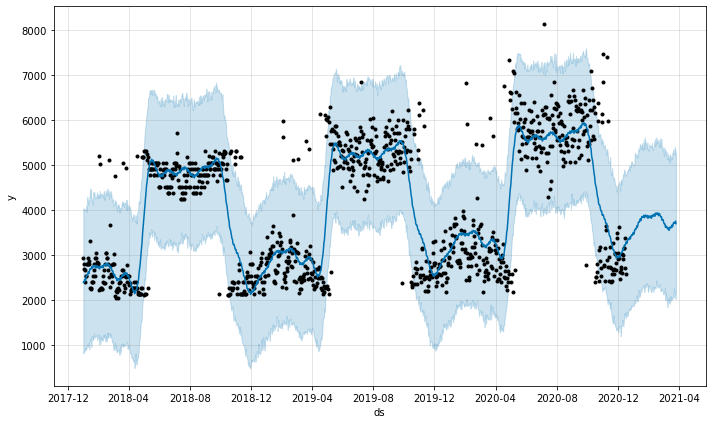

In [20]:
plot1 = model.plot(forecast)

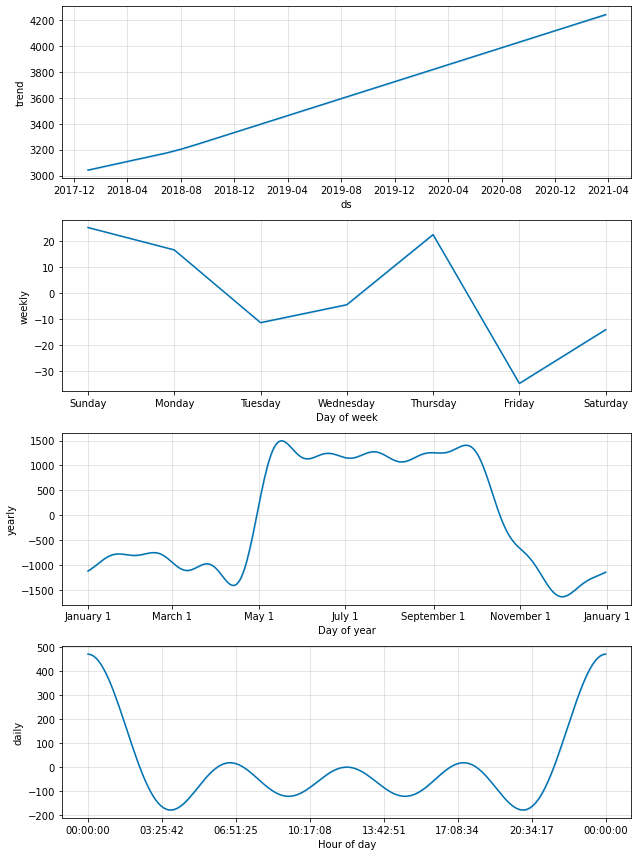

In [21]:
plot2 = model.plot_components(forecast)